In [55]:
import sys
sys.path.append("..")
import pickle

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import

In [57]:
results = pd.read_csv("output/advantages_by_ante.csv")

In [58]:
results.head(3)

,player1_granularity,player2_granularity,player1_depth,player2_depth,game_depth,ante,result
0,3,10,2,2,2,0.1,-0.005291
1,3,10,2,2,2,0.2,-0.019254
2,3,10,2,2,2,0.3,-0.022046


In [59]:
results[['player1_granularity', 'player2_granularity', 'player1_depth', 'player2_depth']].drop_duplicates()

,player1_granularity,player2_granularity,player1_depth,player2_depth
0,3,10,2,2
20,5,5,1,3


# clean

In [60]:
clean_results = results\
    .assign(competition_type = lambda x:np.select(
            [(x.player1_granularity != x.player2_granularity), (x.player1_depth != x.player2_depth)],
            ["More granularity (3 vs 10)", "More depth (1 vs 3)"],
            default = "Other"),
            result = lambda x:-1*x.result)

# Plots

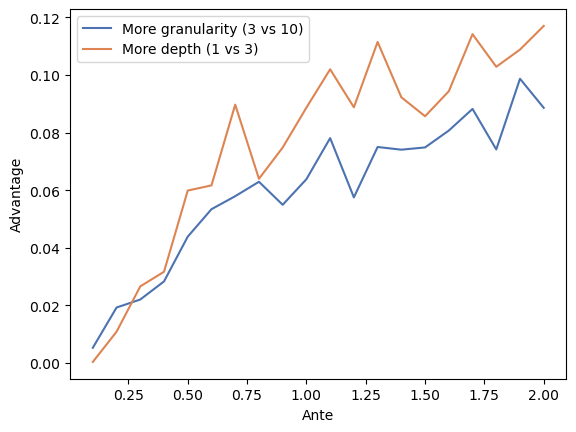

In [61]:
ax = sns.lineplot(data=clean_results, x = 'ante', y = 'result', hue = "competition_type", palette = 'deep')
ax.set(xlabel="Ante", ylabel="Advantage")
ax.legend(title = '')
plt.savefig(f'output/competition_advantage_by_ante')